<a href="https://www.kaggle.com/code/pranavjha24/cifar-10-classification-using-cnn?scriptVersionId=200236927" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


<h2 style='color:blue' align='center'>Classification Using Convolutional Neural Network (CNN)</h2>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2024-10-09 21:11:43.035263: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 21:11:43.035485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 21:11:43.233823: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h4 style="color:purple">Load the dataset</h4>

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

We will convert the 2D array `y_train` into a 1D array for our classification task.

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

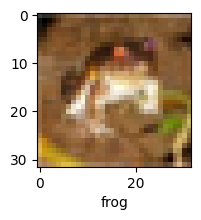

In [11]:
plot_sample(X_train, y_train, 0)

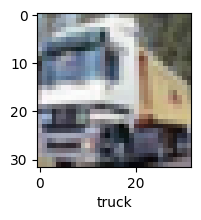

In [12]:
plot_sample(X_train, y_train, 1)

To normalize the images to a range from 0 to 1, we need to divide each value in the image by 255. Each image has 3 channels (R, G, B), and each value in these channels ranges from 0 to 255. Therefore, the normalization process involves dividing each pixel value by 255.

<h4 style="color:purple">Normalizing the training data</h4>

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.3046 - loss: 1.9315
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.4166 - loss: 1.6518
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.4511 - loss: 1.5543
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.4769 - loss: 1.4892
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4958 - loss: 1.4350


**As we can see that at the end of the 5th epoch, accuracy is at around 49.78%**

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.44      0.48      1000
           1       0.63      0.56      0.59      1000
           2       0.39      0.25      0.31      1000
           3       0.43      0.17      0.24      1000
           4       0.32      0.57      0.41      1000
           5       0.51      0.25      0.34      1000
           6       0.45      0.63      0.53      1000
           7       0.63      0.42      0.51      1000
           8       0.41      0.81      0.54      1000
           9       0.55      0.49      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3879 - loss: 1.6881
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5958 - loss: 1.1591
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6540 - loss: 0.9961
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6874 - loss: 0.9030
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7138 - loss: 0.8239


With a Convolutional Neural Network (CNN), after 5 epochs, the accuracy reached approximately 71.71%, which is a significant improvement over the Artificial Neural Network (ANN). CNNs are highly effective for image classification tasks and provide excellent accuracy. 

Additionally, the computational requirements are lower compared to a simple ANN, as max-pooling reduces the image dimensions while still preserving important features.


In [19]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6867 - loss: 0.9123


[0.9172990322113037, 0.6866999864578247]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[2.1063054e-03, 7.8134574e-03, 1.2424579e-02, 7.7719671e-01,
        3.3211471e-03, 1.2818272e-01, 3.3227999e-02, 1.9489470e-03,
        2.9531740e-02, 4.2462177e-03],
       [1.0524886e-02, 2.6149851e-01, 1.4220647e-04, 1.4581048e-05,
        1.4723711e-06, 4.9695103e-07, 8.2367717e-07, 6.2967242e-06,
        7.2426945e-01, 3.5411920e-03],
       [8.3667286e-02, 3.5456890e-01, 5.8029932e-03, 2.3048375e-02,
        5.3214454e-03, 2.3160519e-03, 3.6516739e-04, 9.8329084e-03,
        3.4187967e-01, 1.7319717e-01],
       [7.6997977e-01, 3.0589417e-02, 5.6217786e-02, 1.8977987e-03,
        2.5911301e-02, 5.1877218e-05, 9.6168788e-04, 2.2442152e-03,
        1.1129488e-01, 8.5110520e-04],
       [8.1623490e-05, 3.5200350e-04, 8.2680009e-02, 1.9857143e-01,
        2.2481689e-01, 1.4075901e-02, 4.7706285e-01, 2.1017986e-04,
        2.1391313e-03, 1.0048333e-05]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

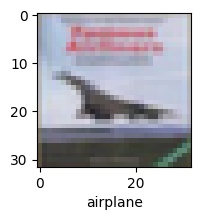

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'